## Imports

In [4]:
import os
import sys
# data_directory = 'D:/2M/D.Mining/Data-Mining-Project/'
# os.chdir(data_directory)

# sys.path.append('D:\\2M\D.Mining\Data-Mining-Project\\')
sys.path.insert(0, r"C:\Users\HI\My-Github\Data-Mining-Project")

from src.utils import central_tendances, calculate_quartiles, histogram_plot, bar_plot
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# data_directory = 'D:/2M/D.Mining/Data-Mining-Project/'
# os.chdir(data_directory)

# sys.path.append('D:\\2M\D.Mining\Data-Mining-Project\\')

In [5]:
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["figure.dpi"] = 100

## Load Data

In [7]:
df = pd.read_csv('../data/processed/static_dataset3_discretized.csv', index_col=0)

## Data Exploration

In [9]:
df.head()

,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer,Temperature_freq_disc,Temperature_width_disc,Humidity_freq_disc,Humidity_width_disc,Rainfall_freq_disc,Rainfall_width_disc
0,24.87,82.84,295.61,Clayey,rice,DAP,"Temperature [24.4, 25.2]","Temperature [24.0, 25.0]","Humidity [82.0, 82.9]","Humidity [82.1, 84.1]","Rainfall [268.9, 298.6]","Rainfall [281.8, 298.6]"
1,28.69,96.65,178.96,laterite,Coconut,Good NPK,"Temperature [27.8, 28.8]","Temperature [27.9, 28.9]","Humidity [95.3, 97.0]","Humidity [96.0, 98.0]","Rainfall [164.5, 182.6]","Rainfall [164.6, 181.3]"
2,20.27,81.64,270.44,silty clay,rice,MOP,"Temperature [20.1, 21.7]","Temperature [20.0, 21.0]","Humidity [80.6, 82.0]","Humidity [80.1, 82.1]","Rainfall [268.9, 298.6]","Rainfall [265.1, 281.8]"
3,25.07,95.02,192.90,sandy,Coconut,Urea,"Temperature [24.4, 25.2]","Temperature [25.0, 25.9]","Humidity [93.8, 95.3]","Humidity [94.0, 96.0]","Rainfall [182.6, 192.9]","Rainfall [181.3, 198.1]"
4,25.04,95.90,174.80,coastal,Coconut,Urea,"Temperature [24.4, 25.2]","Temperature [25.0, 25.9]","Humidity [95.3, 97.0]","Humidity [94.0, 96.0]","Rainfall [164.5, 182.6]","Rainfall [164.6, 181.3]"


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 0 to 294
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             295 non-null    float64
 1   Humidity                295 non-null    float64
 2   Rainfall                295 non-null    float64
 3   Soil                    295 non-null    object 
 4   Crop                    295 non-null    object 
 5   Fertilizer              295 non-null    object 
 6   Temperature_freq_disc   295 non-null    object 
 7   Temperature_width_disc  295 non-null    object 
 8   Humidity_freq_disc      295 non-null    object 
 9   Humidity_width_disc     295 non-null    object 
 10  Rainfall_freq_disc      295 non-null    object 
 11  Rainfall_width_disc     295 non-null    object 
dtypes: float64(3), object(9)
memory usage: 30.0+ KB


In [12]:
for col in df.columns:
    print(f"Column name: {col}")
    print(f"Column type: {df[col].dtype}")
    unique_values = df[col].unique()
    num_unique = df[col].nunique()
    num_missing = df[col].isnull().sum()

    print(f"Number of unique values: {num_unique}")
    if num_unique < 15:
        print(f"Unique values: {unique_values}")
    print(f"Number of missing values: {num_missing}")
    print("-" * 40)

Column name: Temperature
Column type: float64
Number of unique values: 173
Number of missing values: 0
----------------------------------------
Column name: Humidity
Column type: float64
Number of unique values: 187
Number of missing values: 0
----------------------------------------
Column name: Rainfall
Column type: float64
Number of unique values: 195
Number of missing values: 0
----------------------------------------
Column name: Soil
Column type: object
Number of unique values: 7
Unique values: ['Clayey' 'laterite' 'silty clay' 'sandy' 'coastal' 'clay loam' 'alluvial']
Number of missing values: 0
----------------------------------------
Column name: Crop
Column type: object
Number of unique values: 2
Unique values: ['rice' 'Coconut']
Number of missing values: 0
----------------------------------------
Column name: Fertilizer
Column type: object
Number of unique values: 4
Unique values: ['DAP' 'Good NPK' 'MOP' 'Urea']
Number of missing values: 0
-----------------------------------

### Central Tendencies

In [ ]:
for col in df.columns:
    if df[col].dtype != "object":
        central_tendencies = central_tendances(df[col])
        mean = f"{central_tendencies[0]:.2f}"
        median = f"{central_tendencies[1]}"
        mode = f"{central_tendencies[2]}"

        print(f"Column name: {col}")
        print(f"Mean: {mean} || Median: {median} || Mode: {mode}")

Column name: Temperature
Mean: 25.52 || Median: 25.775 || Mode: [25.07, 25.95, 23.43, 25.76, 22.68, 26.31, 26.8]
Column name: Humidity
Mean: 88.47 || Median: 84.97 || Mode: [95.02, 83.73, 83.88]
Column name: Rainfall
Mean: 205.33 || Median: 203.435 || Mode: [134.84]


### Quartiles

In [ ]:
for col in df.columns:
    quartiles = calculate_quartiles(df[col])
    print(f"Column name: {col}")
    print(f"Minimum: {quartiles[0]}")
    print(f"Q1: {quartiles[1]}")
    print(f"Q2: {quartiles[2]}")
    print(f"Q3: {quartiles[3]}")
    print(f"Maximum: {quartiles[4]}")
    print("-" * 40)

Column name: Temperature
Minimum: 20.05
Q1: 23.79
Q2: 25.76
Q3: 27.15
Maximum: 29.87
----------------------------------------
Column name: Humidity
Minimum: 80.12
Q1: 82.23
Q2: 84.97
Q3: 94.8
Maximum: 99.98
----------------------------------------
Column name: Rainfall
Minimum: 131.09
Q1: 172.48
Q2: 202.94
Q3: 231.38
Maximum: 298.56
----------------------------------------
Column name: Soil
Minimum: Clayey
Q1: alluvial
Q2: coastal
Q3: sandy
Maximum: silty clay
----------------------------------------
Column name: Crop
Minimum: Coconut
Q1: Coconut
Q2: Coconut
Q3: rice
Maximum: rice
----------------------------------------
Column name: Fertilizer
Minimum: DAP
Q1: DAP
Q2: MOP
Q3: Urea
Maximum: Urea
----------------------------------------
Column name: Temperature_freq_disc
Minimum: [20.1, 21.7]
Q1: [23.4, 24.4]
Q2: [25.2, 25.8]
Q3: [26.9, 27.8]
Maximum: [28.8, 29.9]
----------------------------------------
Column name: Temperature_width_disc
Minimum: [20.0, 21.0]
Q1: [23.0, 24.0]
Q2: [25.

## Visualizations

### Visualization of numerical data

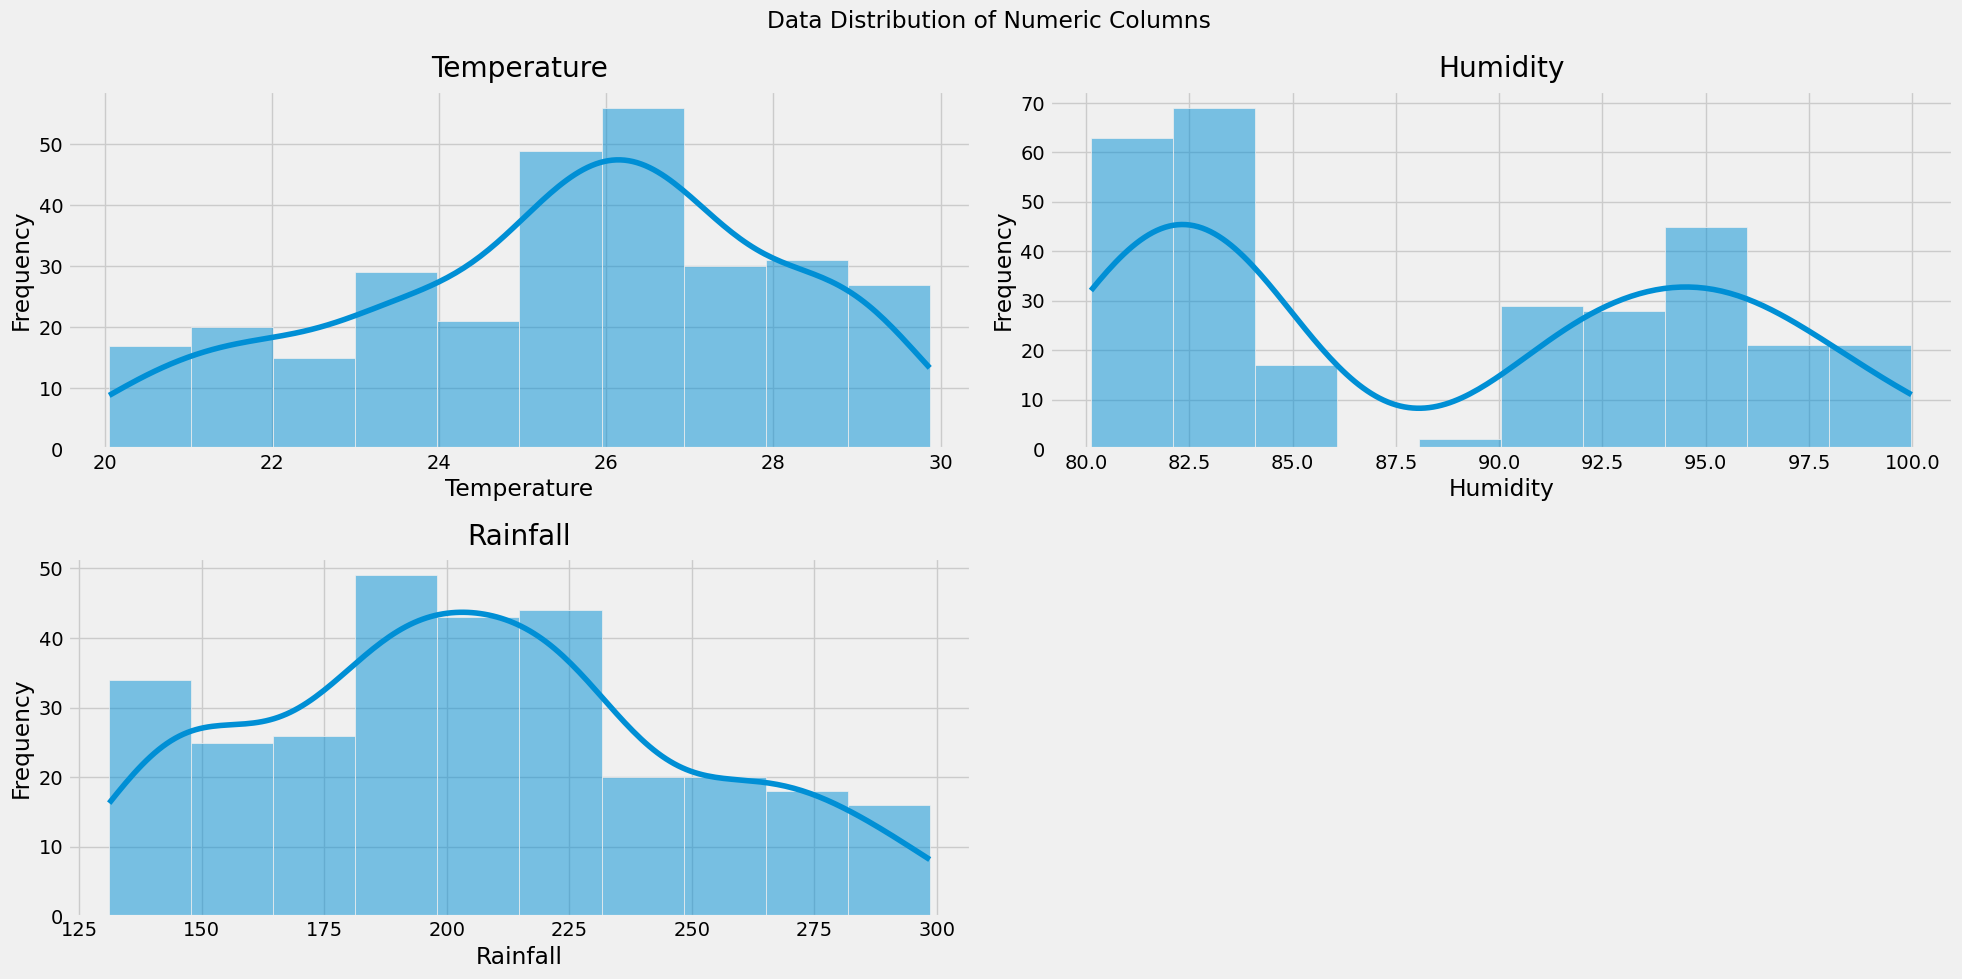

In [ ]:
# Plot in one subplot
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle("Data Distribution of Numeric Columns")
for ax, col in zip(axes.flatten(), df.columns):
    if df[col].dtype != "object":
        sns.histplot(df[col], kde=True, ax=ax)
        ax.set(ylabel="Frequency")
        ax.set_title(col, pad=10)  # Adjust the pad parameter for title spacing

plt.tight_layout()
fig.delaxes(axes[1, 1])
plt.show()
fig.savefig('reports/figures/03_EDA/Data Distribution of Numeric Columns')

### Visualization of categorical data

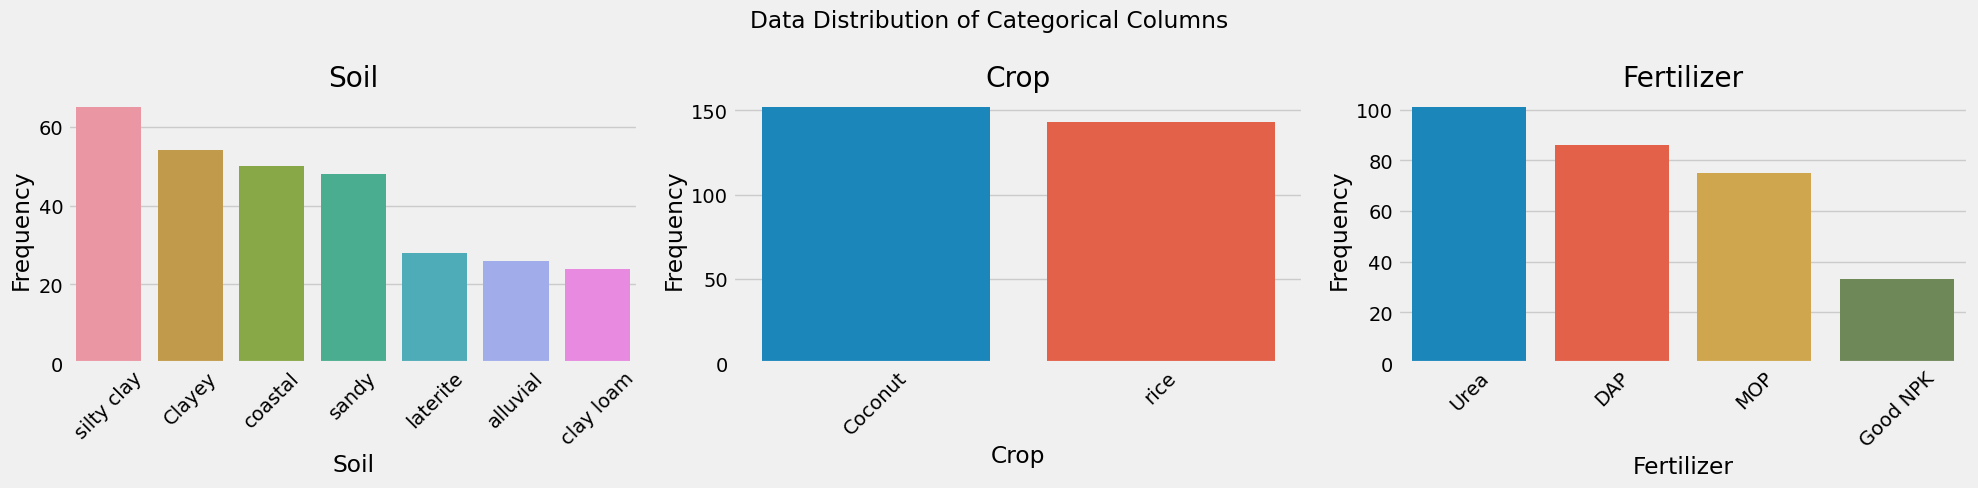

In [ ]:
cat_cols = ['Soil', 'Crop', 'Fertilizer']

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle("Data Distribution of Categorical Columns")
for ax, col in zip(axes.flatten(), cat_cols):
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts(), ax=ax)
    ax.set(ylabel="Frequency")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_title(col)
fig.tight_layout()
fig.savefig('reports/figures/03_EDA/Data_Distribution_of_Categorical_Columns')